In [1]:
import xlrd

In [2]:
book = xlrd.open_workbook("LLUVIAS.xls", 'r')

In [3]:
sheets = book.sheet_names()

In [4]:
sheets

['LLUVIAS']

In [5]:
active_sheet = book.sheet_by_name(sheets[0])

In [6]:
active_sheet.nrows

587

In [7]:
active_sheet.ncols

46

In [8]:
def mapMonth(argument):
    switcher = {
        "ENERO" : 1,
        "FEB" : 2,
        "MARZO" : 3,
        "ABRIL" : 4,
        "MAYO" : 5,
        "JUNIO" : 6,
        "JULIO" : 7,
        "AGOSTO" : 8,
        "SEPT" : 9,
        "OCTUB" : 10,
        "NOV" : 11,
        "DIC" : 12
    }
    return switcher.get(argument.upper(), "Invalid month name")

In [9]:
mapMonth('dic')

12

In [10]:
def isInteger(n):
    try: 
        int(n)
    except: 
        return False
    return True

In [11]:
import datetime

day = 0
month = '' 
year = 0

date_array = []
rain_array = []

for row_index in range(active_sheet.nrows):
    for col_index in range(32):
        cell_data = active_sheet.cell(row_index, col_index).value
        if(row_index % 14 == 0):
            if(col_index == 0):
                year = int(active_sheet.cell(row_index, col_index).value)
        elif(col_index == 0):
            month = str(active_sheet.cell(row_index, col_index).value)
        elif(year > 0 and month != ''):
            day = col_index
            date = str(year) + "-" + str(mapMonth(month)) + "-" + str(day)
                        
            if(int(year) >= 2019 and int(mapMonth(month)) > 2):
                break   
            
            try:
                datetime.datetime.strptime(date, '%Y-%m-%d')
            except ValueError:
                break
                    
            if (cell_data != '' and isInteger(cell_data)):
                rain = int(active_sheet.cell(row_index, col_index).value)
            else:
                rain = 0
            
            date_array.append(date)
            
            rain_array.append(rain)           

In [12]:
import numpy as np

In [13]:
matrix = np.array([date_array,rain_array])
matrix = matrix.transpose()

In [14]:
import pandas as pd 
df = pd.DataFrame(matrix)
df.columns = ['date','rain']
df.to_csv("rain.csv",index=False,)

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
import pandas as pd
lluvias = pd.read_csv("rain.csv", parse_dates = True, index_col="date" )

In [16]:
import matplotlib.pyplot as plt

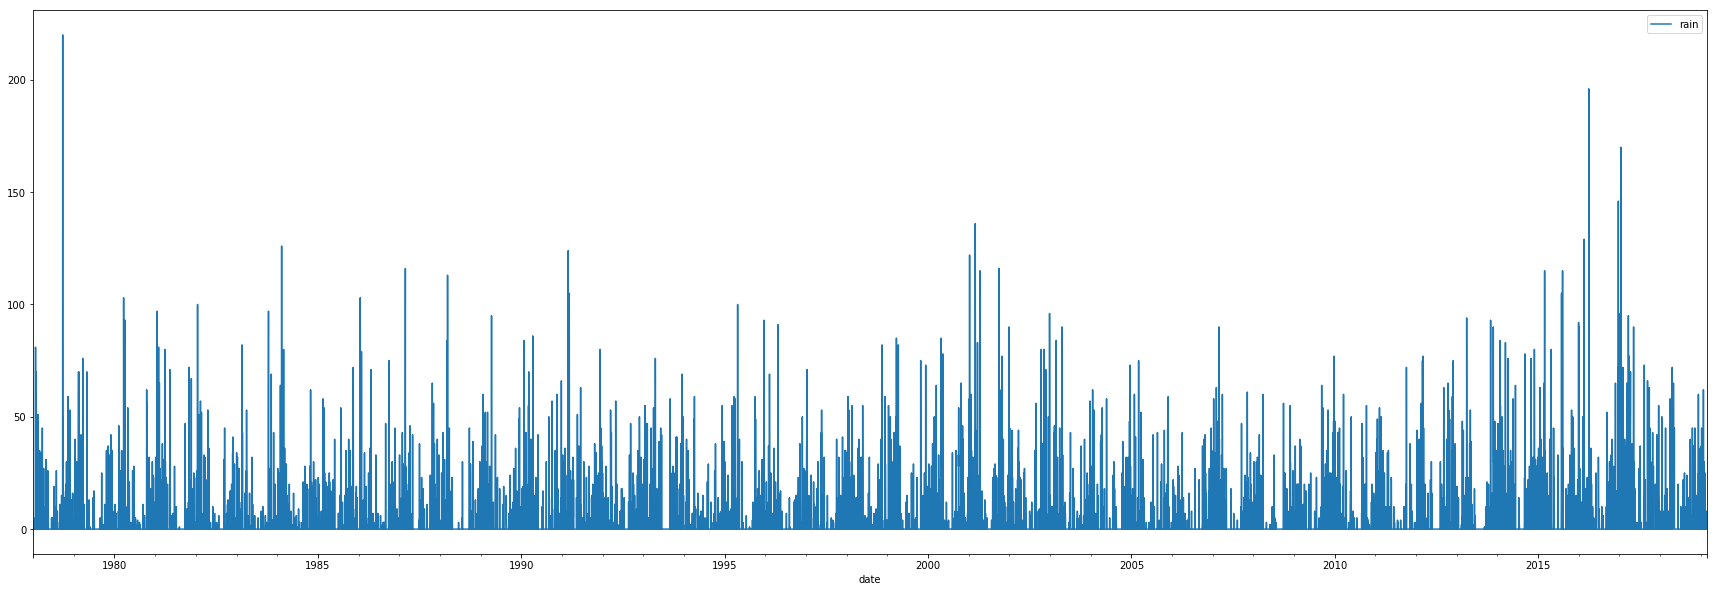

In [17]:
lluvias.plot(figsize=(30,10))

In [18]:
lluvias.describe()

,rain
count,15034.000000
mean,3.331914
std,11.451975
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,220.000000


In [19]:
lluvias.head()

,rain
date,
1978-01-01,0
1978-01-02,0
1978-01-03,0
1978-01-04,0
1978-01-05,0
